*my main perpose of making of this kernel is to give a better understanding of math behind algorithms *

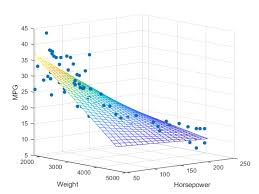

here my discussion about the importance of math behind machine learing ....

https://www.kaggle.com/getting-started/111585

and this kernel is totally only for regression algorithms.

**what is regression algorithms? .**

In machine learning, regression algorithms attempt to estimate the mapping function (f) from the input variables (x) to numerical or continuous output variables (y).
In this case, y is a real value, which can be an integer or a floating point value. Therefore, regression prediction problems are usually quantities or sizes.
For example, when provided with a dataset about houses, and you are asked to predict their prices, that is a regression task because price will be a continuous output.

firstly lets start with very well know regression algorithms 

**1. Linear Regression**

It is the simplest form of regression. It is a technique in which the dependent variable is continuous in nature. The relationship between the dependent variable and independent variables is assumed to be linear in nature.Goal is to design a model that can predict marks if given the number of hours studied. Using the training data, a regression line is obtained which will give minimum error. This linear equation is then used for any new data. That is, if we give number of hours studied by a student as an input, our model should predict their mark with minimum error.

Y(pred) = b0 + b1*x

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [ ]:
X = 2*np.random.rand(100,1)
y = 4+3*X+np.random.randn(100,1)

randomly genrate data usingf numpy ..!

In [ ]:
plt.plot(X,y,'b.')
plt.xlabel("X")
plt.ylabel("Y")
plt.axis([0,2,0,15])
plt.show()

In [ ]:
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

as i said if we pass all the our training data to our hypothesis equation we get our y predition 

Y(pred) = b0 + b1*x

but how choose b0 and b1 ?

The values b0 and b1 must be chosen so that they minimize the error. If sum of squared error is taken as a metric to evaluate the model, then goal to obtain a line that best reduces the error.
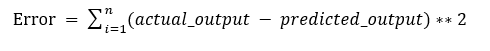

In [ ]:
theta_best

In [ ]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

In [ ]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
plt.show()

as python made our lifes easy ... al this is prebuit in         **sklearn.linear_model **

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

for doing this we need to use Optimizing tech to find global minimize. normally we have so many Optimizing algorithms,now we will use gradient descent method for getting the gobal minimum 
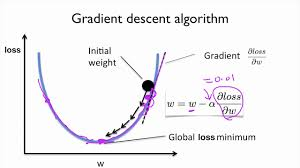

In [ ]:
eta = 0.1
n_iterations = 1000
m = 100
theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [ ]:
theta

In [ ]:
X_new_b.dot(theta)

lets move on to next regression algorithm

**2. Polynomial Regression**

Linear regression requires the relation between the dependent variable and the independent variable to be linear. What if the distribution of the data was more complex as shown in the below figure?thats where the polynomial regression come into picture 

In [ ]:
import numpy as np
import numpy.random as rnd

np.random.seed(42)

In [ ]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

In [ ]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

the straight line is unable to capture the patterns in the data. This is an example of under-fitting.To overcome under-fitting, we need to increase the complexity of the model.To generate a higher order equation we can add powers of the original features as new features. The linear model,

                       Y(pred) = b0 + b1*x

should be transformed to

This is still considered to be linear model as the coefficients/weights associated with the features are still linear. x² is only a feature. However the curve that we are fitting is quadratic in nature.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

In [ ]:
X_poly[0]

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

In [ ]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

It is quite clear from the plot that the quadratic curve is able to fit the data better than the linear line...

so depends on the data we have to choose the algorithms :)

**3.Logistic regression**

In logistic regression, the dependent variable is binary in nature (having two categories). Independent variables can be continuous or binary. In multinomial logistic regression, you can have more than two categories in your dependent variable.

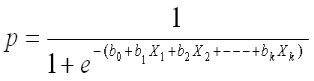

In [ ]:
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
plt.show()

this is how it looks ..!

Logistic regression models the probability of the default classFor example, if we are modeling people’s sex as male or female from their height, then the first class could be male and the logistic regression model could be written as the probability of male given a person’s height, or more formally:

P(sex=male|height)

Written another way, we are modeling the probability that an input (X) belongs to the default class (Y=1), we can write this formally as:

P(X) = P(Y=1|X)

We’re predicting probabilities ! I thought logistic regression was a classification algorithm? :)

Note that the probability prediction must be transformed into a binary values (0 or 1) in order to actually make a probability prediction. More on this later when we talk about making predictions.

In [ ]:
#lets do this using iris dataset 
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())
#to know more about the dataset 
#print(iris.DESCR)

In [ ]:
X = iris["data"][:, 3:]  # petal width
y = (iris["target"] == 2).astype(np.int) 

from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys()) # 1 if Iris-Virginica, else 0

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X, y)

In [ ]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")

same as in linear regression we need to nake our cost function and minimize in order to get the gobal minimum 

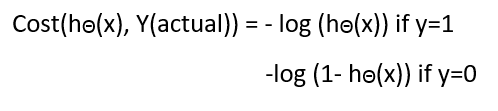

and use any of Optimizing algorithms and get gobal minimum 

**4.Quantile regression**

There are at least two motivations for quantile regression: Suppose our dependent variable is bimodal or multimodal that is, it has multiple humps. If we knew what caused the multimodality, we could separate on that variable and do stratified analysis, but if we don’t know that, quantile regression might be good. (ordinary least squares)OLS regression will, here, be as misleading as relying on the mean as a measure of centrality for a bimodal distribution.


In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
%matplotlib inline 

data = sm.datasets.engel.load_pandas().data
data.head()

In quantile regression we try to estimate the quantile of the dependent variable given the values of X's.Note that the dependent variable should be continuous.

Quantile regression model:
For qth quantile we have the following regression model,
This seems similar to linear regression model but here the objective function we consider to minimize is:
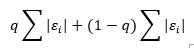
where q is the qth quantile.

If q = 0.5 i.e. if we are interested in the median then it becomes median regression (or least absolute deviation regression) and substituting the value of q = 0.5 in above equation we get the objective function as:


**Least Absolute Deviation**

The LAD model is a special case of quantile regression where q=0.5

In [ ]:
mod = smf.quantreg('foodexp ~ income', data)
res = mod.fit(q=.5)
print(res.summary())

**Visualizing the results**

We estimate the quantile regression model for many quantiles between .05 and .95, and compare best fit line from each of these models to Ordinary Least Squares results.

For convenience, we place the quantile regression results in a Pandas DataFrame, and the OLS results in a dictionary.

In [ ]:
quantiles = np.arange(.05, .96, .1)
def fit_model(q):
    res = mod.fit(q=q)
    return [q, res.params['Intercept'], res.params['income']] + \
            res.conf_int().loc['income'].tolist()

models = [fit_model(x) for x in quantiles]
models = pd.DataFrame(models, columns=['q', 'a', 'b', 'lb', 'ub'])

ols = smf.ols('foodexp ~ income', data).fit()
ols_ci = ols.conf_int().loc['income'].tolist()
ols = dict(a = ols.params['Intercept'],
           b = ols.params['income'],
           lb = ols_ci[0],
           ub = ols_ci[1])

print(models)
print(ols)

This plot compares best fit lines for 10 quantile regression models to the least squares fit. As Koenker and Hallock (2001) point out, we see that:

1.Food expenditure increases with income

2.The dispersion of food expenditure increases with income

3.The least squares estimates fit low income observations quite poorly (i.e. the OLS line passes over most low income households)

In [ ]:
x = np.arange(data.income.min(), data.income.max(), 50)
get_y = lambda a, b: a + b * x

fig, ax = plt.subplots(figsize=(8, 6))

for i in range(models.shape[0]):
    y = get_y(models.a[i], models.b[i])
    ax.plot(x, y, linestyle='dotted', color='grey')

y = get_y(ols['a'], ols['b'])

ax.plot(x, y, color='red', label='OLS')
ax.scatter(data.income, data.foodexp, alpha=.2)
ax.set_xlim((240, 3000))
ax.set_ylim((240, 2000))
legend = ax.legend()
ax.set_xlabel('Income', fontsize=16)
ax.set_ylabel('Food expenditure', fontsize=16);

In [ ]:
n = models.shape[0]
p1 = plt.plot(models.q, models.b, color='black', label='Quantile Reg.')
p2 = plt.plot(models.q, models.ub, linestyle='dotted', color='black')
p3 = plt.plot(models.q, models.lb, linestyle='dotted', color='black')
p4 = plt.plot(models.q, [ols['b']] * n, color='red', label='OLS')
p5 = plt.plot(models.q, [ols['lb']] * n, linestyle='dotted', color='red')
p6 = plt.plot(models.q, [ols['ub']] * n, linestyle='dotted', color='red')
plt.ylabel(r'$\beta_{income}$')
plt.xlabel('Quantiles of the conditional food expenditure distribution')
plt.legend()
plt.show()

**5.Ridge regression**

It's important to understand the concept of regularization before jumping to ridge regression.

**Regularization**

Regularization helps to solve over fitting problem which implies model performing well on training data but performing poorly on validation (test) data. Regularization solves this problem by adding a penalty term to the objective function and control the model complexity using that penalty term.

**L1 Loss function or L1 Regularization**

In L1 regularization we try to minimize the objective function by adding a penalty term to the **sum of the absolute values of coefficients**. This is also known as least absolute deviations method. Lasso Regression makes use of L1 regularization.

**L2 Loss function or L2 Regularization**

In L2 regularization we try to minimize the objective function by adding a penalty term to the **sum of the squares of coefficients**.RidgeRegression or shrinkage regression makes use of L2 regularization.

Traditional linear fitting involves minimizing the RSS (residual sum of squares). In ridge regression, a new parameter is added, and now the parameters will minimize:

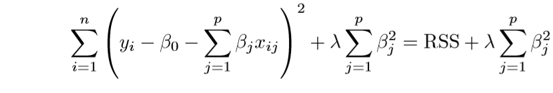

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

In [ ]:
X = iris["data"][:, 3:]  # petal width
y = (iris["target"] == 2).astype(np.int)  # 1 if Iris-Virginica, else 0

first lets do with linear regression and then compare with ridge 

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

mes = cross_val_score(reg,X,y,scoring='neg_mean_squared_error',cv=5)
mean_mes = np.mean(mes)
print(mean_mes)

we introduce GridSearchCV. This will allow us to automatically perform 5-fold cross-validation with a range of different regularization parameters in order to find the optimal value of alpha.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge 

ridge = Ridge()

parameters = {'alpha':[1e-15,1e-10,1e-8,1e-4,1e-3,1e-2,1,5,10,20]}
ridge_reg = GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_reg.fit(X,y)

In [ ]:
print(ridge_reg.best_params_)
print(ridge_reg.best_score_)

You should see that the optimal value of alpha is 5, with a negative MSE of -0.15373851579535563 . This is a slight improvement upon the basic multiple linear regression

**6. Lasso Regression**

Lasso stands for Least Absolute Shrinkage and Selection Operator. It makes use of L1 regularization technique in the objective function. Thus the objective function in LASSO regression becomes:

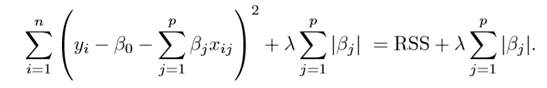

λ is the regularization parameter and the intercept term is not regularized. We do not assume that the error terms are normally distributed.
For the estimates we don't have any specific mathematical formula but we can obtain the estimates using some statistical software.
Note that lasso regression also needs standardization.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

lasso = Lasso()

parameters = {'alpha':[1e-15,1e-10,1e-8,1e-4,1e-3,1e-2,1,5,10,20]}
ridge_reg = GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_reg.fit(X,y)

In [ ]:
print(ridge_reg.best_params_)
print(ridge_reg.best_score_)

you can observe change 

**7. Elastic Net Regression**

Elastic Net regression is preferred over both ridge and lasso regression when one is dealing with highly correlated independent variables.
It is a combination of both L1 and L2 regularization.

The objective function in case of Elastic Net Regression is:

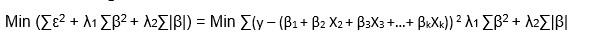

Like ridge and lasso regression, it does not assume normality.

In [ ]:
from sklearn import datasets
bostan = datasets.load_boston()
#Tto know more about the dataset 
#print(bostan.DESCR)

In [ ]:
bostan_df = pd.DataFrame(bostan.data,columns=bostan.feature_names)
bostan_df.head()

lets add the dependent variable house_price 

In [ ]:
bostan_df['house_price'] = bostan.target
bostan_df.head()
bostan_df.describe()

In [ ]:
X = bostan_df.drop('house_price',axis=1)
y = bostan_df['house_price']

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
els_reg = ElasticNet()
els_reg

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [ ]:
els_reg.fit(X_train,y_train)

In [ ]:
print('RSquare value of elastic net :')
np.round(els_reg.score(X_test,y_test)*100,2)

In [ ]:
predict_els = els_reg.predict(X_test)

In [ ]:
from sklearn import metrics
print('mean square error for ElasticNet for Test Data:')
np.round(metrics.mean_squared_error(y_test,predict_els),2)

**8. Principal Components Regression (PCR)**

PCR is a regression technique which is widely used when you have many independent variables OR multicollinearity exist in your data. It is divided into 2 steps:

    1.Getting the Principal components
    2.Run regression analysis on principal components

The most common features of PCR are:

    1.Dimensionality Reduction
    2.Removal of multicollinearity
    
**Getting the Principal components**
Principal components analysis is a statistical method to extract new features when the original features are highly correlated. We create new features with the help of original features such that the new features are uncorrelated.

lets do this using Hitters data ...

In [ ]:
import pandas as pd
Hitters = pd.read_csv("../input/hitters/Hitters.csv")

In [ ]:
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression, PLSSVD
from sklearn.metrics import mean_squared_error

get dumies of columns ...

In [ ]:
dummies = pd.get_dummies(Hitters[['League', 'Division', 'NewLeague']])

In [ ]:
Hitters['Salary'].fillna('0',inplace=True)

In [ ]:
y = Hitters.Salary
X_ = Hitters.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')

In [ ]:
X = pd.concat([X_, dummies[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)

Principal components regression (PCR) can be performed using the PCA() function, which is part of the sklearn library. In this lab, we'll apply PCR to the Hitters data, in order to predict Salary...

In [ ]:
pca = PCA()
X_reduced = pca.fit_transform(scale(X))

In [ ]:
pd.DataFrame(pca.components_.T).loc[:4,:5]

Now we'll perform 10-fold cross-validation to see how it influences the MSE:

In [ ]:
from sklearn import model_selection
# 10-fold CV, with shuffle
n = len(X_reduced)
kf_10 = model_selection.KFold( n_splits=10, shuffle=True, random_state=1)

regr = LinearRegression()
mse = []

# Calculate MSE with only the intercept (no principal components in regression)
score = -1*model_selection.cross_val_score(regr, np.ones((n,1)), y.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using CV for the 19 principle components, adding one component at the time.
for i in np.arange(1, 20):
    score = -1*model_selection.cross_val_score(regr, X_reduced[:,:i], y.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
# Plot results    
plt.plot(mse, '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Salary')
plt.xlim(xmin=-1);

We see that the smallest cross-validation error occurs when  M=18  components are used. This is barely fewer than  M=19 , which amounts to simply performing least squares, because when all of the components are used in PCR no dimension reduction occurs. However, from the plot we also see that the cross-validation error is roughly the same when only one component is included in the model. This suggests that a model that uses just a small number of components might suffice.

In [ ]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

**9. Support Vector Regression**

Those who are in Machine Learning or Data Science are quite familiar with the term SVM or Support Vector Machine. But SVR is a bit different from SVM. As the name suggest the SVR is an regression algorithm , so we can use SVR for working with continuous Values instead of Classification which is SVM.

So the first thing we have to understand is what is this boundary line ?(yes! that red line). Think of it as to lines which are at a distance of ‘e’ (though not e its basically epsilon) but for simplicity lets say its ‘e’.

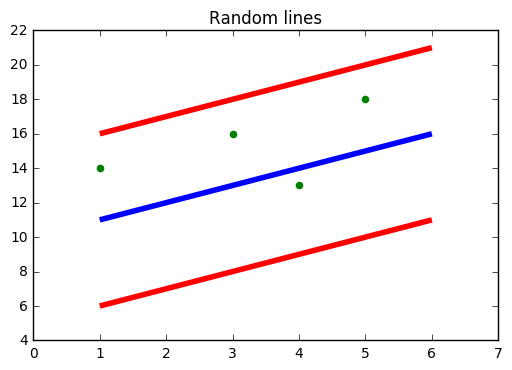

Assuming our hyper plane is a straight line going through the Y axis

WX+b=0 

So we can state that the two the equation of the boundary lines are

Wx+b=+e
Wx+b=-e

respectively
Thus coming in terms with the fact that for any linear hyper plane the equation that satisfy our SVR is:

e≤y-Wx-b≤+e

stating the fact that y=Wx+b

y-Wx-b=0

This applies for all other type of regression (non-linear,polynomial)


In [ ]:
import pandas as pd
df = pd.read_csv("../input/hitters/Hitters.csv")

In [ ]:
dummies = pd.get_dummies(Hitters[['League', 'Division', 'NewLeague']])
Hitters['Salary'].fillna('0',inplace=True)

In [ ]:
y = Hitters.Salary
X = Hitters.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')

In [ ]:
from sklearn.svm import SVR
regressor=SVR(kernel='linear',degree=1)

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,y)
regressor.fit(xtrain,ytrain)
pred=regressor.predict(xtest)
print(regressor.score(xtest,ytest))

In [ ]:
from sklearn.metrics import r2_score
print(r2_score(ytest,pred))

#NOTE: kernel=’linear’ → we are setting the kernel to a linear kernel
#DEFAULT: kernel=’rbf’

>SVR(kernel=’rbf’,epsilon=1.0,degree=3)

#here we set the kernel to ‘rbf’ of degree 3 and a epsilon value of 1.0

#by default the kernel is ‘rbf’ degree is 3 and epsilon is 0.1

#other kernels are → ‘linear’,’poly’(for polynomial),’ rbf’

**10.Random Forest Regression**

A Random Forest is an ensemble technique capable of performing both regression and classification tasks with the use of multiple decision trees and a technique called Bootstrap Aggregation, commonly known as bagging. What is bagging you may ask? Bagging, in the Random Forest method, involves training each decision tree on a different data sample where sampling is done with replacement.

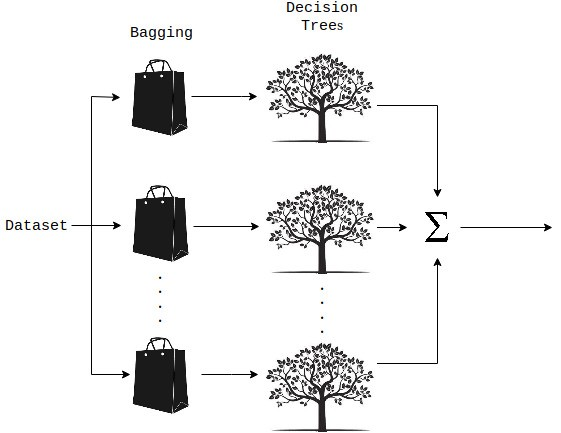


The basic idea behind this is to combine multiple decision trees in determining the final output rather than relying on individual decision trees. If you want to read more on Random Forests, I have included some reference links which provide in depth explanations on this topic.

In [ ]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler

In [ ]:
def rfr_model(X, y):
# Perform Grid-Search
    gsc = GridSearchCV(
        estimator=RandomForestRegressor(),
        param_grid={
            'max_depth': range(3,7),
            'n_estimators': (10, 50, 100, 1000),
        },
        cv=5, scoring='neg_mean_squared_error', verbose=0,n_jobs=-1)
    
    grid_result = gsc.fit(X, y)
    best_params = grid_result.best_params_
    
    rfr = RandomForestRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"],random_state=False, verbose=False)
    scores = cross_val_score(rfr, X, y, cv=10, scoring='neg_mean_absolute_error')

    return scores

In [ ]:
rfr_model(X,y)

**11.XGBoost**

XGBoost is one of the most popular machine learning algorithm these days. Regardless of the type of prediction task at hand; regression or classification

**Boosting**

Boosting is a sequential technique which works on the principle of an ensemble. It combines a set of weak learners and delivers improved prediction accuracy. At any instant t, the model outcomes are weighed based on the outcomes of previous instant t-1. The outcomes predicted correctly are given a lower weight and the ones miss-classified are weighted higher. Note that a weak learner is one which is slightly better than random guessing. For example, a decision tree whose predictions are slightly better than 50%.

In [ ]:
from sklearn.datasets import load_boston
boston = load_boston()

In [ ]:
print(boston.keys())

In [ ]:
data = pd.DataFrame(boston.data)
data.columns = boston.feature_names

In [ ]:
data.head()

In [ ]:
data['PRICE'] = boston.target

In [ ]:
data.info()

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

In [ ]:
X, y = data.iloc[:,:-1],data.iloc[:,-1]

Now you will convert the dataset into an optimized data structure called **Dmatrix** that XGBoost supports and gives it acclaimed performance and efficiency gains. You will use this later in the tutorial.

In [ ]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [ ]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [ ]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,max_depth = 5, alpha = 10, n_estimators = 10)

In [ ]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

Well, you can see that your RMSE for the price prediction came out to be around 10.8 per 1000$.

**that's all for this kernal ....**

**thank you for reading if u like this please upvote that keeps me motivation....
**
**thank you ..... :)**